In [1]:
import pandas as pd
import plotly.express as px
import os

# 1. Chargement du dataset
print("Chargement des données en cours...")
home = os.path.expanduser('~')
path = os.path.join(home, 'work/data/yellow-taxi.parquet')
df = pd.read_parquet(path)

print("✅ Données chargées avec succès. Voici un aperçu :")
display(df.head())

Chargement des données en cours...
✅ Données chargées avec succès. Voici un aperçu :


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
0,1,2024-05-01 00:59:15,2024-05-01 01:23:50,1.0,6.10,1.0,N,138,145,1,28.2,7.75,0.5,5.00,0.00,1.0,42.45,0.0,1.75
1,2,2024-04-30 23:58:26,2024-05-01 00:29:42,1.0,11.23,1.0,N,138,249,1,46.4,6.00,0.5,8.72,0.00,1.0,66.87,2.5,1.75
2,2,2024-05-01 00:57:17,2024-05-01 01:14:15,1.0,9.02,1.0,N,138,170,1,35.9,6.00,0.5,10.57,6.94,1.0,65.16,2.5,1.75
3,2,2024-05-01 00:24:47,2024-05-01 00:48:51,1.0,6.53,1.0,N,87,133,1,30.3,1.00,0.5,7.06,0.00,1.0,42.36,2.5,0.00
4,2,2024-05-01 00:11:20,2024-05-01 00:52:10,1.0,14.38,1.0,N,161,165,1,61.8,1.00,0.5,0.00,0.00,1.0,66.80,2.5,0.00


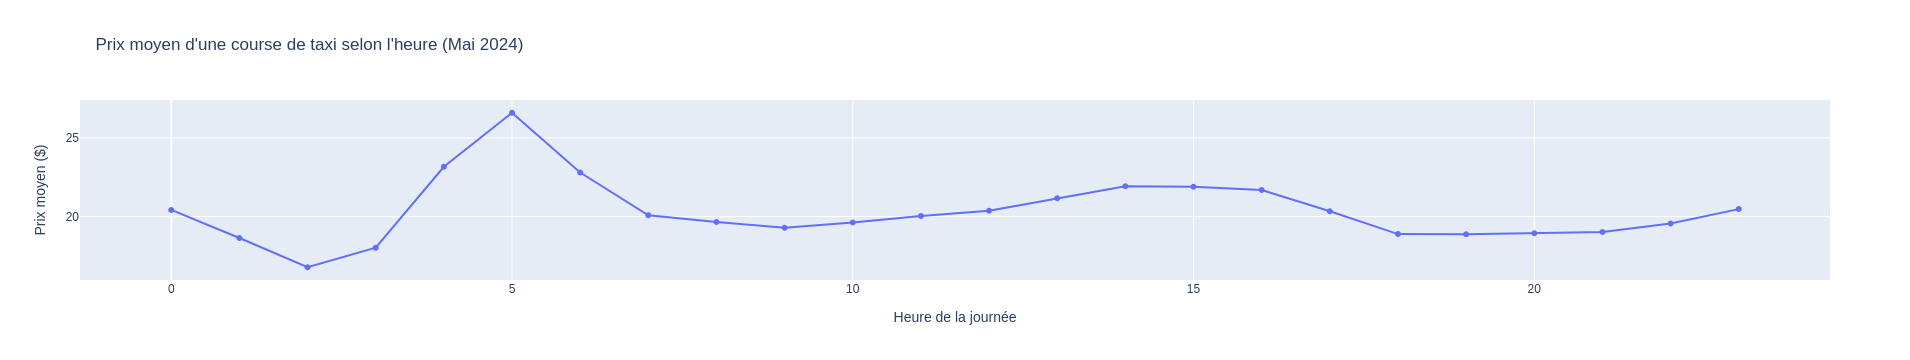

In [2]:
# 2. Petit nettoyage et préparation
# On filtre les trajets avec une distance et un prix positifs pour la cohérence
df_filtered = df[(df['trip_distance'] > 0) & (df['fare_amount'] > 0)].copy()
df_filtered['tpep_pickup_datetime'] = pd.to_datetime(df_filtered['tpep_pickup_datetime'])
df_filtered['hour'] = df_filtered['tpep_pickup_datetime'].dt.hour

# 3. Analyse : Prix moyen par heure
stats_prix = df_filtered.groupby('hour')['fare_amount'].mean().reset_index()

# 4. Visualisation
fig = px.line(
    stats_prix, 
    x='hour', 
    y='fare_amount',
    title="Prix moyen d'une course de taxi selon l'heure (Mai 2024)",
    labels={'hour': 'Heure de la journée', 'fare_amount': 'Prix moyen ($)'},
    markers=True
)
fig.show()


In [3]:
# 5. Exportation du résultat dans le dossier créé par votre script init.sh
output_path = os.path.join(home, 'work/results/prix_moyen_par_heure.csv')

stats_prix.to_csv(output_path, index=False)
print(f"💾 Les statistiques agrégées ont été sauvegardées dans : {output_path}")

💾 Les statistiques agrégées ont été sauvegardées dans : /home/onyxia/work/results/prix_moyen_par_heure.csv


In [4]:
# Envoie de résultats sur S3
!bash save_results.sh

📤 Début de l'exportation des résultats vers S3...
..._heure.csv: 529 B / 529 B ┃▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓┃ 4.48 KiB/s 0s
== WARN: `minio.lab.sspcloud.fr` certificate will expire in 2026-02-26 12:48:48 +0000 UTC. Renew soon to avoid outage.

✅ Succès ! Vos fichiers ont été sauvegardés dans : s3/pacordonnier/results_demo_20260219
Contenu exporté :
]11;?\[2026-02-19 09:25:50 UTC]   529B STANDARD prix_moyen_par_heure.csv

== WARN: `minio.lab.sspcloud.fr` certificate will expire in 2026-02-26 12:48:48 +0000 UTC. Renew soon to avoid outage.



In [6]:
# Petit bonus : Afficher les 5 trajets les plus longs
print("\n--- Top 5 des trajets les plus longs ---")
display(df_filtered.sort_values(by='trip_distance', ascending=False).head(5))


--- Top 5 des trajets les plus longs ---


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,hour
3579515,2,2024-05-18 21:21:00,2024-05-18 21:31:00,NaN,249151.44,NaN,None,231,113,0,16.30,0.0,0.5,0.00,0.0,1.0,20.30,NaN,NaN,21
3687564,2,2024-05-28 08:45:00,2024-05-28 09:26:00,NaN,241289.24,NaN,None,25,162,0,57.03,0.0,0.5,0.00,0.0,1.0,61.03,NaN,NaN,8
3393488,2,2024-05-07 07:22:00,2024-05-07 07:29:00,NaN,240124.26,NaN,None,74,42,0,8.52,0.0,0.5,0.00,0.0,1.0,10.02,NaN,NaN,7
3480214,2,2024-05-13 08:32:00,2024-05-13 09:11:00,NaN,201625.54,NaN,None,33,140,0,37.24,0.0,0.5,8.25,0.0,1.0,49.49,NaN,NaN,8
3429135,2,2024-05-10 09:25:00,2024-05-10 09:38:00,NaN,182726.11,NaN,None,24,74,0,25.47,0.0,0.5,5.39,0.0,1.0,32.36,NaN,NaN,9
